<a href="https://colab.research.google.com/github/fasilthalapoyil/Stock-Price-Prediction/blob/main/Stock_price_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load Data (Tesla Stock Prices)
stock_data = yf.download('TSLA', start='2019-01-01', end='2024-01-01')
stock_data = stock_data[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


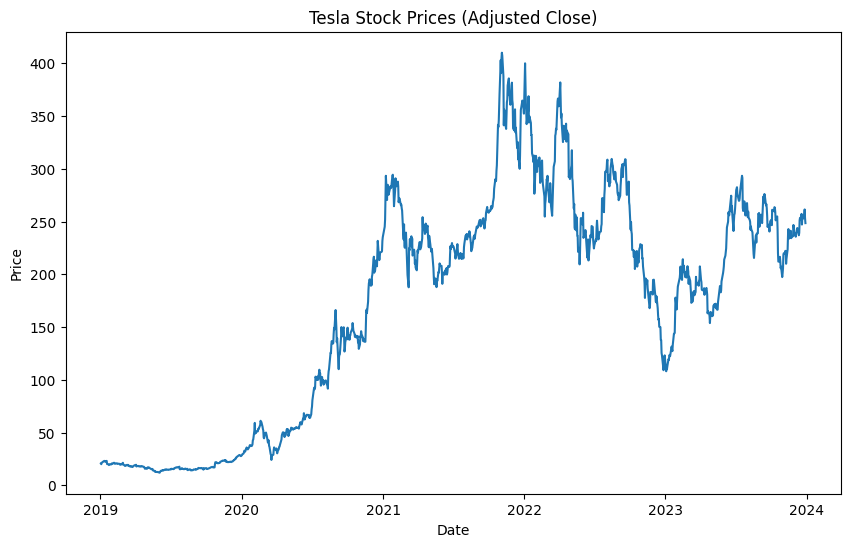

In [ ]:
# Plot the stock data
plt.figure(figsize=(10, 6))
plt.plot(stock_data)
plt.title('Tesla Stock Prices (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# 2. Preprocess the Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)

In [ ]:
# Split data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


In [ ]:
# Function to create sequences (X, y) for LSTM input
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [ ]:
# Create sequences for train and test sets
time_steps = 60
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)

# Reshape X_train and X_test to be in the format [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
# 3. Build the LSTM Model (Stacked LSTM with 2 layers)
model = Sequential()

In [ ]:
# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add a second LSTM layer (with return_sequences=False)
model.add(LSTM(units=50, return_sequences=False))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Dense layer to output the final prediction
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 4. Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# 5. Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 6. Make Predictions
predictions = model.predict(X_test)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - loss: 0.0857 - val_loss: 0.0043
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - loss: 0.0073 - val_loss: 0.0023
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0047 - val_loss: 0.0021
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.

In [ ]:
# Inverse transform the predictions and actual values to original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

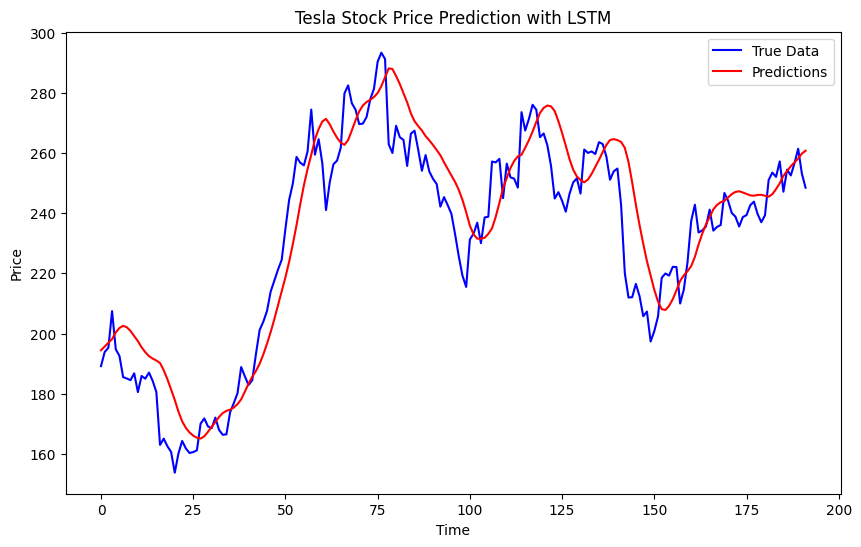

In [ ]:
# 7. Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True Data', color='blue')
plt.plot(predictions_rescaled, label='Predictions', color='red')
plt.title('Tesla Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# Optionally, evaluate the model using RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f'RMSE: {rmse}')

RMSE: 13.277572043623932
